In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.cm as cm
import pickle

# Write the file names without the .txt extension
# Mention the extension in the list variable "extend" of corresponding files
'''
paths=["./../BruteForce/","./../KDTree/","./../Shadab/"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
techniques=["BF","KDTree","SHDB"]
'''
'''
paths=["./../BruteForce/","./../KDTree/","./../PKDTree"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
techniques=["BF","KDTree","PKDTree"]
'''
'''
paths=["./../BruteForce/","./../PKDTree/"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
extend=["txt","txt","txt"]
techniques=["BF","PKDTree"]
'''

paths=["./../BruteForce/","./../PKDTree/"]
fileNames=["DLAhost_snap49_r1_b1T10 (copy)"]
extend=["txt"]
techniques=["BF","PKDTree"]

setNumber=9

colors1=itertools.cycle(["r","g","b"])
colors2=cm.rainbow(np.linspace(0, 1, len(fileNames)*len(techniques)))

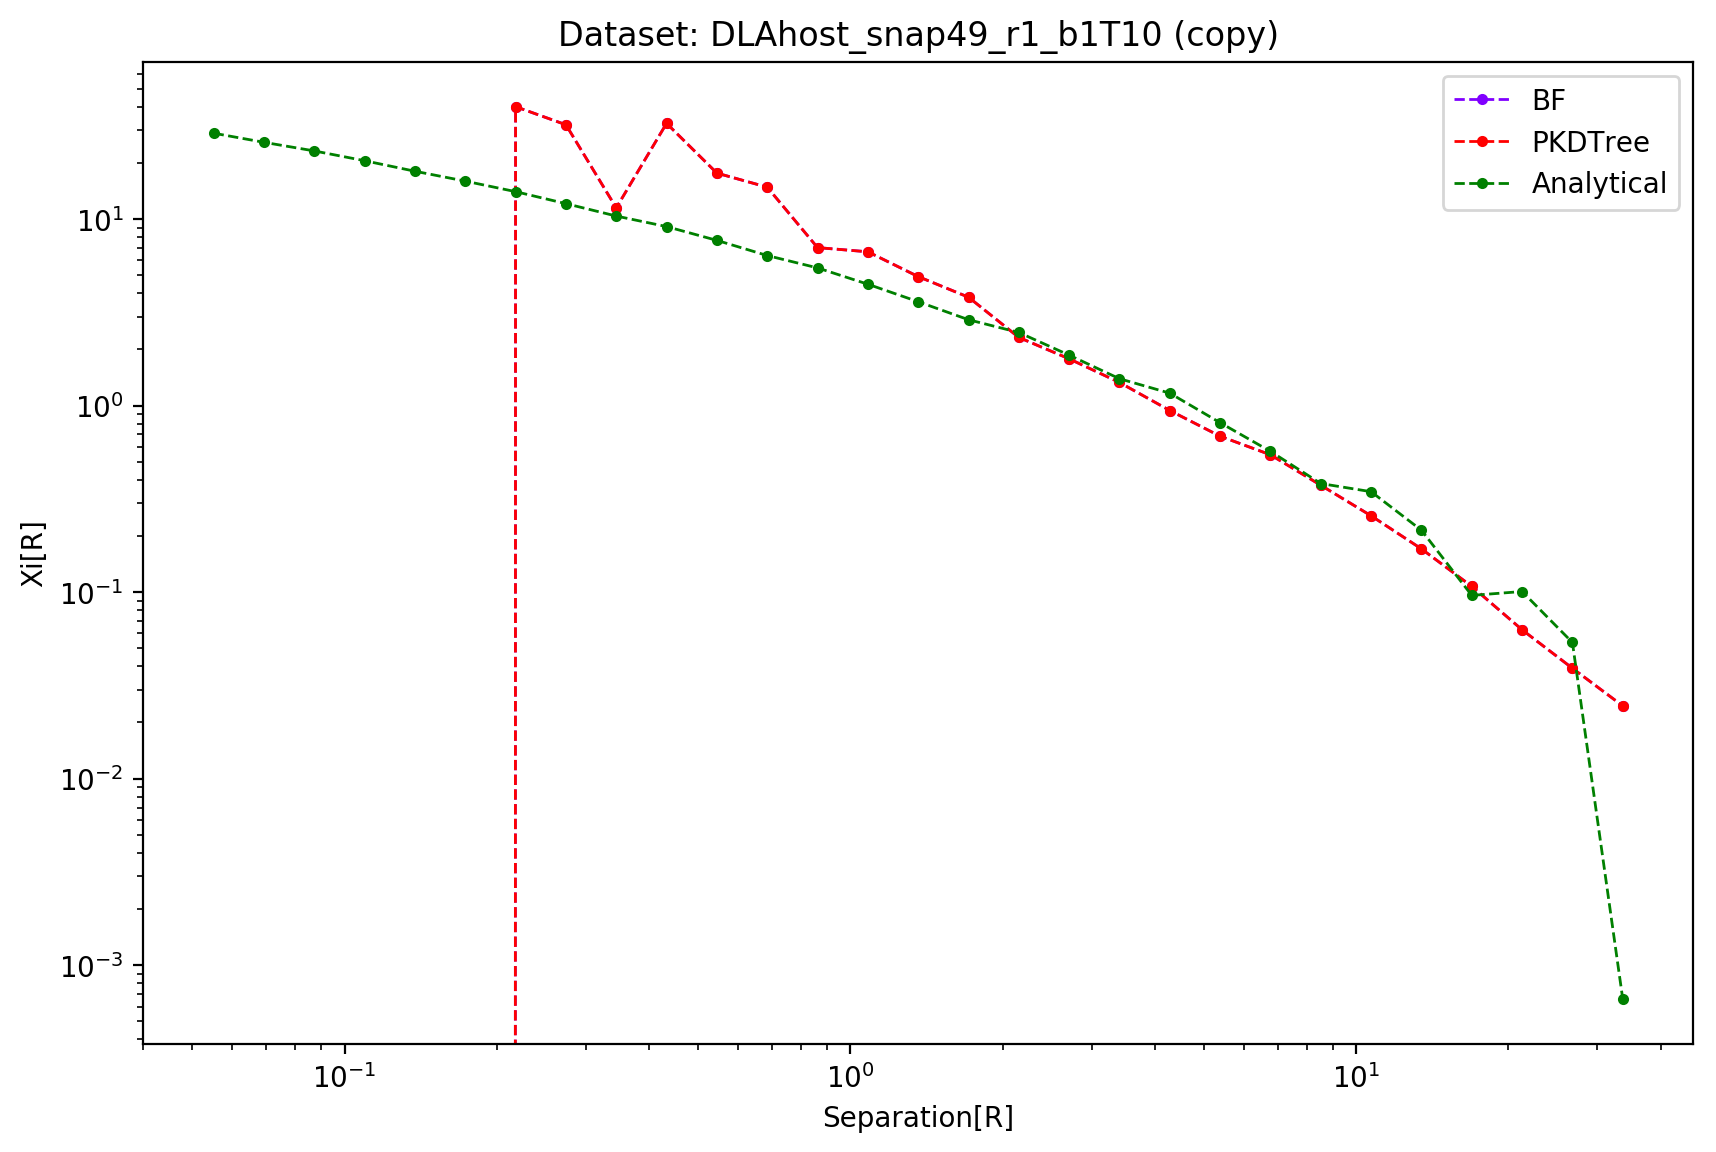

In [2]:
# File reading methods - 'rb'=raw bytes. Will interpret strings as bytes.
figureNum=1
for i in range(0,len(fileNames)):
    plt.figure(figureNum,figsize=(10,6.5), dpi=200, facecolor='w', edgecolor='k')
    for j in range(0,len(techniques)):
        fname=paths[j]+techniques[j]+" "+fileNames[i]+"."+extend[i]
        bins=[]
        corrs=[]
        f=open(fname,'r')
        for line in f:
            if line[0]!='#':
                data=line.split()
                bins.append(float(data[0]))
                corrs.append(float(data[1]))

        plt.plot(bins, corrs, color=colors2[i*len(techniques)+j], marker='o', linestyle='dashed',linewidth=1, markersize=3,label=techniques[j])
   
    a2PC=pickle.load(open("./../Analytical 2PC/Analytic2PC.p","rb"))
    aR=pickle.load(open("./../Analytical 2PC/radii.p","rb"))
    plt.plot(aR,a2PC*2.5e4,color='g',marker='o', linestyle='dashed',linewidth=1, markersize=3,label="Analytical")
    
    plt.legend()
    plt.title("Dataset: "+fileNames[i])
    plt.xlabel("Separation[R]")
    plt.ylabel("Xi[R]")
    plt.xscale("log")
    plt.yscale("log")
    #plt.ylim(0.05,2000)
    figureNum+=1
    plt.savefig('set'+str(setNumber)+'_'+fileNames[i]+'.png', bbox_inches='tight')
plt.show()